为何要降维？

1.使数据集更易使用

2.降低算法计算开销

3.去除噪声

4.使得结果易懂

降维的方式主要有两种方式：

1.主成分分析（PCA）——坐标系转换

2.因子分析——隐变量


# 主成分分析（PCA）

优点：降低数据的复杂性，识别最重要的多个特征

缺点：不一定需要，且可能损失有用信息

适用数据类型：数值型数据

## 基本概念

### 协方差矩阵

In [1]:
# 协方差矩阵
import numpy as np

X = [[2, 0, -1.4],
     [2.2, 0.2, -1.5],
     [2.4, 0.1, -1],
     [1.9, 0, -1.2]]
print(np.cov(np.array(X).T))

[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]


### 特征值与特征向量

In [2]:
# 特征值与特征向量
w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print('特征值：{}\n特征向量：{}'.format(w, v))

特征值：[-0.99999998 -1.00000002]
特征向量：[[ 0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


### 点积

In [3]:
a = [[-0.27, -0.3],
     [1.23, 1.3],
     [0.03, 0.4],
     [-0.67, 0.6],
     [-0.87, 0.6],
     [0.63, 0.1],
     [-0.67, -0.7],
     [-0.87, -0.7],
     [1.33, 1.3],
     [0.13, -0.2]]
b = [[0.73251454], [0.68075138]]
np.dot(a, b)

array([[-0.40200434],
       [ 1.78596968],
       [ 0.29427599],
       [-0.08233391],
       [-0.22883682],
       [ 0.5295593 ],
       [-0.96731071],
       [-1.11381362],
       [ 1.85922113],
       [-0.04092339]])


## 案例：鸢尾花数据集的降维

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

%matplotlib inline

data = load_iris()
y = data.target
print(y)
X = data.data
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4

In [6]:
pca = PCA(n_components=2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
reduced_X = pca.fit_transform(X)
reduced_X

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

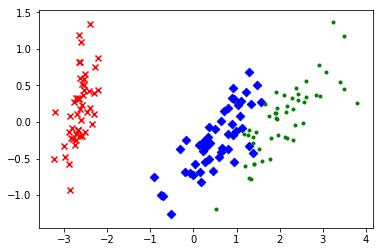

In [8]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

更多参考：

[Python金融大数据分析——第11章 统计学（3）主成分分析（PCA） 笔记](https://blog.csdn.net/weixin_42018258/article/details/80953816)

[PCA 官方文档](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

# 因子分析


因子分析是降维的一种方法，是主成分分析的推广和发展。是用于分析隐藏在表面现象背后的因子作用的统计模型。试图用最少个数的不可测的公共因子的线性函数与特殊因子之和来描述原来观测的每一分量

主要用途

减少分析量变个数。通过变量间相关系数的探测，将原始变量分组，即将相关性高的变量分为一组，用共性因子来替代该变量。使问题背后的业务因素的意义更加清晰呈现。

与主成分分析的区别

主成分分析侧重“变异量”，通过转换原始变量为新的组合变量使得到的数据的“变异量”最大，从而能把样本个体之间的差异最大化，但得出来的主成分往往从业务场景的角度难以解释。

因子分析更重视相关变量的“共变异量”，组合的是相关性较强的原始变量，目的是找到在背后起作用的少量关键因子，因子分析的结果往往更容易用业务知识去加以理解。

因子分析采用了更复杂的数学模型，
求解模型的方法：主成分法，主因子法，极大似然法。
结果还可以通过因子旋转，使到业务意义更加明显。

理论有些复杂，这里就不再赘述。

下面是sklearn中提供的因子分析方法：

[sklearn.decomposition.FactorAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html)

应用参考 [人脸数据集分解](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html)



参考资料：炼数成金Python数据分析课程